# Set up

## Imports

In [6]:
# --- Standard library ---
import os
import subprocess
from time import perf_counter as pc

# --- Scientific ---
import numpy as np  # General computational tools

# --- Network science ---
import networkx as nx
from node2vec import Node2Vec as N2V  # Embedding tools

# --- Data handling and visualization ---
import matplotlib.pyplot as plt
%matplotlib inline

## Globals

In [2]:
Ns = np.logspace(2, 5, num=11, endpoint=True)
gamma = 2.1
tau = 1.0
mu = 0.1
avgk = 20

## Functions

In [3]:
def generate_LFR(N):
    # Generate LFR benchmark
    subprocess.call(
        " ".join([
            "../../bin/LFR/benchmark.sh",
            "-N", f"{N}",
            "-k", f"{avgk}",
            "-maxk", f"{np.sqrt(N)}",
            "-t1", f"{gamma}",
            "-t2", f"{tau}",
            "-mu", f"{mu}"
        ]),
        stdout=open(os.devnull, 'w'),
        stderr=open(os.devnull, 'w'),
        shell=True
    )

    x=np.loadtxt('../../bin/LFR/network.dat')
    edges=[(int(x[i][0])-1,int(x[i][1])-1) for i in range(len(x))]
    g=nx.Graph(edges)

    return g

def embed_graph(g):
    N2V(g, dimensions=128, walk_length=30, num_walks=100, workers=4, quiet=True).fit()

def time_embedding(N):
    g = generate_LFR(N)
    start = pc()
    embed_graph(g)
    return pc() - start

# Sweep w.r.t. N

In [4]:
times = []
Ns_axis = []
for N in Ns:
    for _ in range(5):
        Ns_axis.append(N)
        times.append(time_embedding(N))

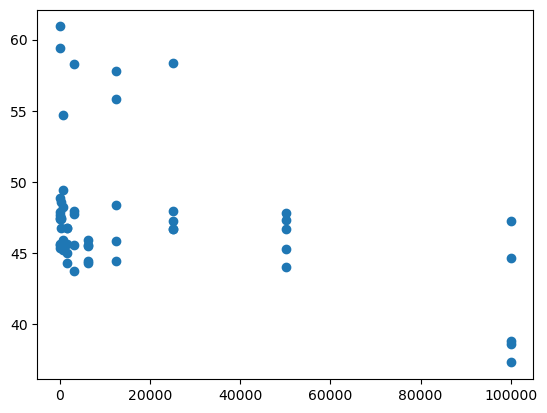

In [9]:
plt.scatter(Ns_axis, times)
plt.savefig("initial_n2v_profiling.png", facecolor="white", transparent=False)